
exercises with statsmodels OLS and WLS created by fbb November 2018

In [1]:

from __future__ import print_function, division
import pylab as pl
import os
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.graphics.api import abline_plot
#s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)
# Error unsupported operand type(s) for +: 'NoneType' and 'str'
%pylab inline

#https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

Populating the interactive namespace from numpy and matplotlib


In [2]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)



## 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars
use the functions created above

In [3]:
#creating a plot with 10 random points between 0 and 100.
#adding error bars to plot



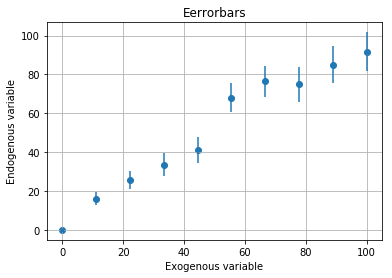

In [4]:
x = np.linspace(0,100,10) 
y = line(1, x, 0, errors=errors)
pl.scatter(x,y, label = "randon points")
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.xlabel("Exogenous variable")
pl.ylabel("Endogenous variable")
pl.title('Eerrorbars')
pl.grid();

## 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [5]:
y 

array([ 0.        , 16.14282235, 25.54805598, 33.54346005, 41.17716893,
       67.91469509, 76.39928459, 74.82906731, 85.07318097, 91.70107207])

In [6]:
x

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

In [7]:
sm.add_constant(x)


array([[  1.        ,   0.        ],
       [  1.        ,  11.11111111],
       [  1.        ,  22.22222222],
       [  1.        ,  33.33333333],
       [  1.        ,  44.44444444],
       [  1.        ,  55.55555556],
       [  1.        ,  66.66666667],
       [  1.        ,  77.77777778],
       [  1.        ,  88.88888889],
       [  1.        , 100.        ]])

# 3.use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

- Fit and summary:

In [8]:
#The Wrong Way 
M = sm.OLS(y, x)
results = M.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     815.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.85e-10
Time:                        21:54:12   Log-Likelihood:                -32.463
No. Observations:                  10   AIC:                             66.93
Df Residuals:                       9   BIC:                             67.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9980      0.035     28.564      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [9]:
#The Right Way 
Mfit= sm.OLS(y, sm.add_constant(x)).fit()

print(Mfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     218.0
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           4.36e-07
Time:                        21:54:12   Log-Likelihood:                -31.596
No. Observations:                  10   AIC:                             67.19
Df Residuals:                       8   BIC:                             67.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          4.6093      3.747      1.230      0.2

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))



## 4. plot the data (as points) and both statsmodels fits

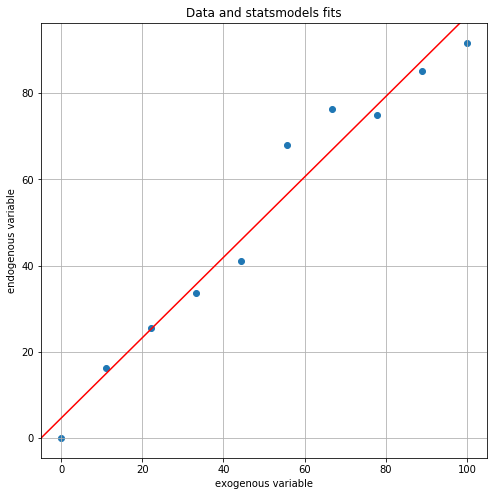

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x,y)
abline_plot(model_results=Mfit, ax=ax, color='red')
plt.title('Data and statsmodels fits')
pl.xlabel("exogenous variable")
pl.ylabel("endogenous variable")
pl.grid()

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

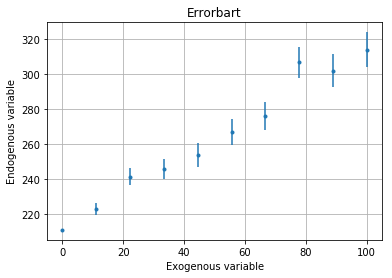

In [11]:
y_new =line(1, x, 211, errors=errors)
pl.errorbar(x=x, y=y_new, yerr=errors(x), fmt=".")

pl.xlabel("Exogenous variable")
pl.ylabel("Endogenous variable")
pl.title('Errorbart')
pl.grid()



## 6. repeat step 3

In [13]:
smfit_new = smf.OLS(y_new, sm.add_constant(x)).fit()
print(smfit_new.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     293.8
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.36e-07
Time:                        21:54:29   Log-Likelihood:                -31.194
No. Observations:                  10   AIC:                             66.39
Df Residuals:                       8   BIC:                             66.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        211.9903      3.599     58.906      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


## 7. repeat step 4

In [14]:
smfit = smf.OLS(y, x).fit()
print(smfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     815.9
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.85e-10
Time:                        21:54:32   Log-Likelihood:                -32.463
No. Observations:                  10   AIC:                             66.93
Df Residuals:                       9   BIC:                             67.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.9980      0.035     28.564      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


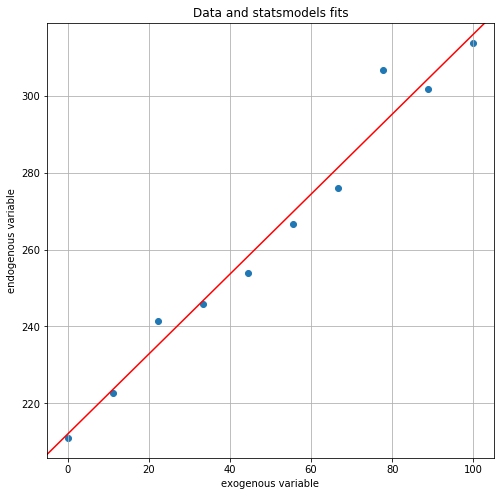

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(x,y_new)
abline_plot(model_results=smfit_new, ax=ax, color='red')
pl.title('Data and statsmodels fits')
pl.xlabel("exogenous variable")
pl.ylabel("endogenous variable")
pl.grid()

## 8. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties¶




In [16]:
WLS = smf.WLS(y_new, sm.add_constant(x)).fit()
print(WLS.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.973
Model:                            WLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     293.8
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.36e-07
Time:                        21:54:36   Log-Likelihood:                -31.194
No. Observations:                  10   AIC:                             66.39
Df Residuals:                       8   BIC:                             66.99
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        211.9903      3.599     58.906      0.0

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the inverse (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule


## 9. Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

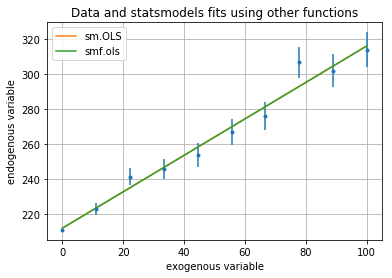

In [18]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfm = smf.ols('y ~ x + const', data={'x':x, 'y':y_new, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y_new, yerr=errors(x), fmt='.')
pl.plot(x, smfm.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfm.fittedvalues, '-', label="smf.ols")
plt.title('Data and statsmodels fits using other functions')
pl.xlabel("exogenous variable")
pl.ylabel("endogenous variable")
pl.legend();
pl.grid();

###### Reference
###### https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html
###### https://www.statsmodels.org/stable/index.html

